In [1]:
import pandas as pd
import numpy as np

1. Загрузите данные по вариантам в ноутбук.

In [7]:
df = pd.read_excel('Вариант 2.xlsx', skiprows=2, skipfooter=1)
df

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
...,...,...,...,...,...,...,...,...,...,...,...
2351,2352,136,11,М,337,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25,92,27
2352,2353,136,11,М,341,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25,92,27
2353,2354,136,11,М,341,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27,96,27
2354,2355,136,11,М,343,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27,96,27


2. Сделайте описательную статистику полученных данных.


In [6]:
df.describe()

,№,№ школы,Номер варианта,Устная часть,Первичный балл,Балл,Минимальный балл
count,2356.000000,2356.000000,2356.000000,0.0,2356.000000,2356.000000,2356.0
mean,1178.500000,132.005518,338.273769,NaN,10.123939,49.255093,27.0
std,680.262939,5.037984,53.660878,NaN,3.820484,17.880420,0.0
min,1.000000,121.000000,101.000000,NaN,1.000000,5.000000,27.0
25%,589.750000,127.000000,339.000000,NaN,7.000000,33.000000,27.0
50%,1178.500000,135.000000,342.500000,NaN,10.000000,50.000000,27.0
75%,1767.250000,136.000000,346.000000,NaN,13.000000,68.000000,27.0
max,2356.000000,137.000000,506.000000,NaN,27.000000,96.000000,27.0


3. Найдите процент учащихся, выполнивших работу ниже среднего.


In [13]:
mean = df["Балл"].mean()

In [ ]:
df_underav = df[df['Балл'] < mean]
df_underav

In [15]:
percentage_underav = df_underav.shape[0] / df.shape[0] * 100
percentage_underav

48.00509337860781

4. Найти процент учащихся не сдавших экзамен.


In [20]:
minb = df['Минимальный балл'][0]

In [22]:
df_failed = df[df['Балл'] < minb]

percentage_failed = df_failed.shape[0] / df.shape[0] * 100
percentage_failed

9.210526315789473

5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.


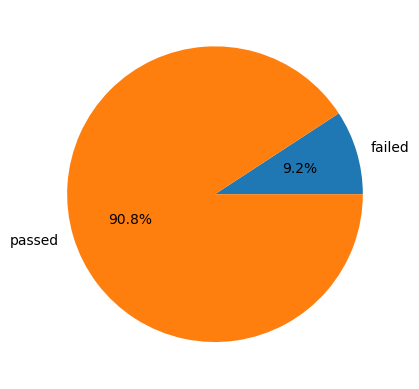

In [47]:
import matplotlib.pyplot as plt

data = [percentage_failed, 100 - percentage_failed]
labels = ['failed', 'passed']

plt.pie(data, labels=labels, autopct = '%1.1f%%')
plt.show()

6. Постройте ядерную оценку плотности распределению баллов за экзамен.


<Axes: xlabel='Балл', ylabel='Density'>

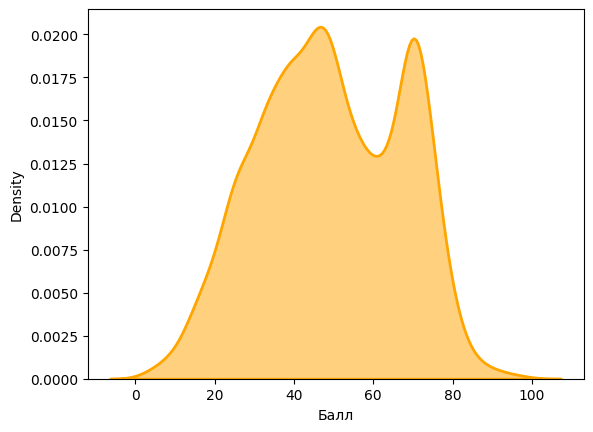

In [46]:
import seaborn as sns

sns.kdeplot(df['Балл'], color='orange', fill=True, alpha=.5, linewidth=2)

7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».


In [50]:
def replace_func(x):
    if x < 63:
        return 2
    elif  62 < x < 77:
        return 3
    elif 76 < x < 91:
        return 4
    else:
        return 5

In [ ]:
df['Балл 5'] = df.loc[:, 'Балл']
df['Балл 5'] = df['Балл 5'].apply(replace_func)
df

In [58]:
df.groupby(['Балл 5']).agg({'Балл 5': 'count'})

,Балл 5
Балл 5,
2,1753
3,519
4,79
5,5


In [53]:
df.groupby(['Балл 5']).agg({'Балл 5': 'count'}) / df.shape[0] * 100

,Балл 5
Балл 5,
2,74.405772
3,22.028862
4,3.353141
5,0.212224


8. Какое процентное соотношение юношей и девушек писало данный экзамен?


9. Сколько школ принимало участие в экзамене?



10. Сколько всего заданий с кратким ответом? С развернутым ответом?


In [59]:
shortAns = df.loc[0, 'Задания с кратким ответом']
len(shortAns)

12

11. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В
, ... Вк
 Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

In [60]:
for i in range(len(shortAns)):
    df.insert(len(df.columns), f'B{i+1}', 0)

In [62]:
for i, _ in df.iterrows():
    shortAns = df.loc[i, 'Задания с кратким ответом']
    for j in range(len(shortAns)):
        df.loc[i, f'B{j+1}'] = shortAns[j]

In [63]:
cols = df.loc[:, 'B1':'B12'].columns
for col in cols:
    print(col, df.groupby([col]).agg({col: 'count'}) / df.shape[0] * 100)

B1           B1
B1          
+   89.26146
-   10.73854
B2           B2
B2          
+   95.33107
-    4.66893
B3           B3
B3          
+   92.78438
-    7.21562
B4            B4
B4           
+   91.001698
-    8.998302
B5            B5
B5           
+   88.497453
-   11.502547
B6            B6
B6           
+   73.174873
-   26.825127
B7            B7
B7           
+   37.478778
-   62.521222
B8            B8
B8           
+   47.835314
-   52.164686
B9            B9
B9           
+   91.850594
-    8.149406
B10           B10
B10          
+    71.47708
-    28.52292
B11            B11
B11           
+    59.252971
-    40.747029
B12            B12
B12           
+    46.222411
-    53.777589
